<a href="https://colab.research.google.com/github/Foluwa/regression_classification/blob/main/Data_Mining_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import mean_squared_error, confusion_matrix, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, explained_variance_score, median_absolute_error, ConfusionMatrixDisplay

In [ ]:
# Set the style
plt.style.use('ggplot')
sns.set(style="whitegrid")

In [ ]:
# Load the dataset
df = pd.read_csv('./dow_jones_index.csv')

In [ ]:
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


# Data Preprocessing

In [ ]:
def clean_value(x):
    if isinstance(x, str) and '$' in x:
        return float(x.replace('$', '').replace(',', ''))
    else:
        return x

In [ ]:
# Remove the dollar sign from columns with dollar values
price_cols = ['open', 'high', 'low', 'close', 'next_weeks_open', 'next_weeks_close']
df[price_cols] = df[price_cols].applymap(clean_value)

In [ ]:
# Display the summary of missing values
print("Summary of missing values:")
print(df.isnull().sum())

Summary of missing values:
quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64


In [ ]:
# Drop rows with missing values
df = df.dropna()

# Exploratory Data Analysis

In [ ]:
df.describe()

,quarter,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
count,720.000000,720.000000,720.000000,720.000000,720.000000,7.200000e+02,720.000000,720.000000,7.200000e+02,720.000000,720.000000,720.000000,720.000000,720.000000
mean,1.541667,53.748375,54.764806,52.727875,53.825486,1.156040e+08,0.030140,5.593627,1.173876e+08,53.808500,53.971319,0.193309,52.259722,0.691564
std,0.498607,32.764255,33.357485,32.238065,32.924759,1.520844e+08,2.504889,40.543478,1.592322e+08,32.919751,33.145594,2.663880,45.881968,0.305077
min,1.000000,10.590000,10.940000,10.400000,10.520000,9.718851e+06,-15.422900,-61.433175,9.718851e+06,10.520000,10.520000,-15.422900,0.000000,0.065574
25%,1.000000,29.965000,30.662500,28.712500,30.415000,3.069225e+07,-1.297355,-19.804284,3.067832e+07,30.385000,30.507500,-1.252413,24.000000,0.534092
50%,2.000000,46.015000,46.910000,44.950000,46.125000,5.274535e+07,0.000000,0.512586,5.294556e+07,46.040000,45.930000,0.035998,47.000000,0.680141
75%,2.000000,72.805000,74.340000,71.105000,72.765000,1.311530e+08,1.630870,21.800622,1.333230e+08,72.805000,73.002500,1.792650,69.250000,0.854024
max,2.000000,172.110000,173.540000,167.820000,170.580000,1.054415e+09,9.882230,327.408924,1.453439e+09,172.110000,174.540000,9.882230,329.000000,1.564210


In [ ]:
# Check the data types after conversion
df.dtypes

quarter                                 int64
stock                                  object
date                                   object
open                                  float64
high                                  float64
low                                   float64
close                                 float64
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                       float64
next_weeks_close                      float64
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object

In [ ]:
print(df['stock'].unique())

['AA' 'AXP' 'BA' 'BAC' 'CAT' 'CSCO' 'CVX' 'DD' 'DIS' 'GE' 'HD' 'HPQ' 'IBM'
 'INTC' 'JNJ' 'JPM' 'KRFT' 'KO' 'MCD' 'MMM' 'MRK' 'MSFT' 'PFE' 'PG' 'T'
 'TRV' 'UTX' 'VZ' 'WMT' 'XOM']


<Figure size 1200x1200 with 0 Axes>

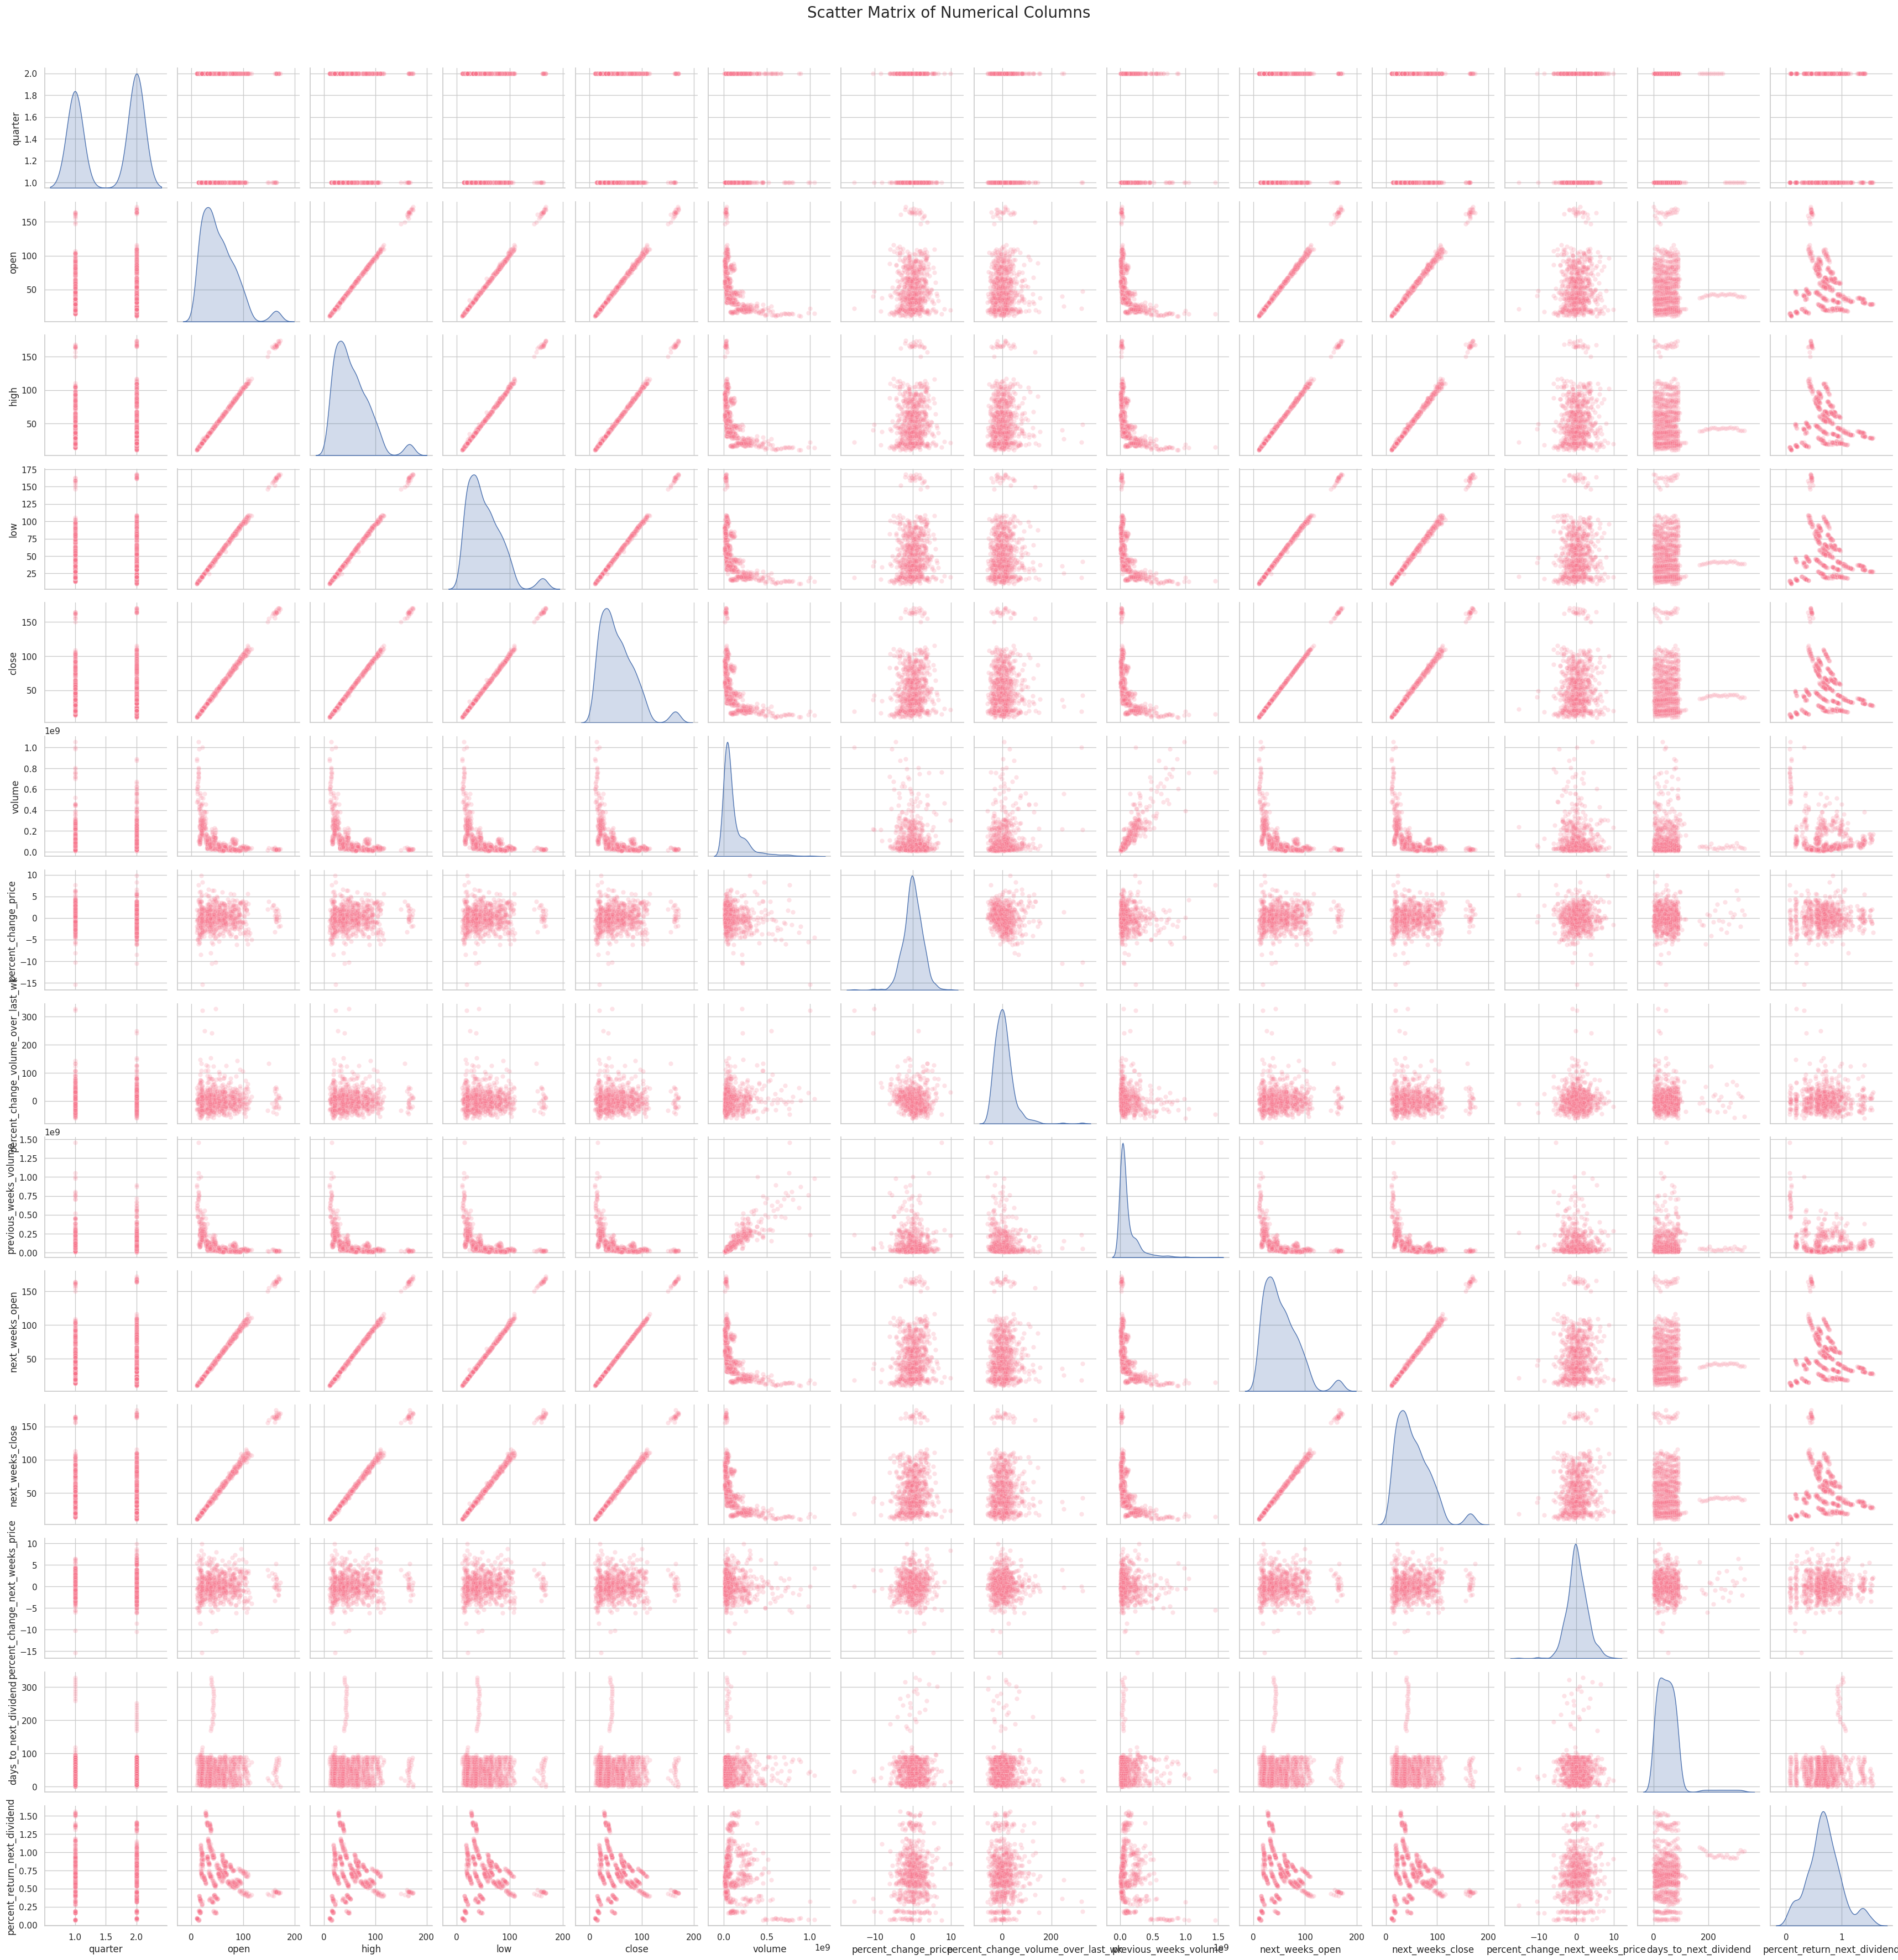

In [ ]:
# Define colors for the scatter matrix
colors = sns.color_palette("husl", len(df.columns))

# Scatter matrix to visualize all numerical columns relationships
plt.figure(figsize=(12, 12))
scatter_matrix = sns.pairplot(df.select_dtypes(include=['float64', 'int64']), diag_kind='kde', plot_kws={'alpha':0.2, 'color': colors[0]})
scatter_matrix.fig.suptitle("Scatter Matrix of Numerical Columns",fontsize=20, y=1.02)
plt.show()

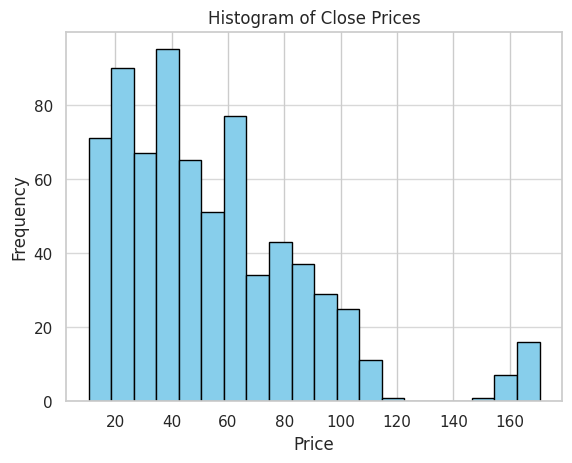

In [ ]:
# Plot a histogram of the 'close' prices
plt.figure(facecolor='white')
plt.hist(df['close'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Close Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

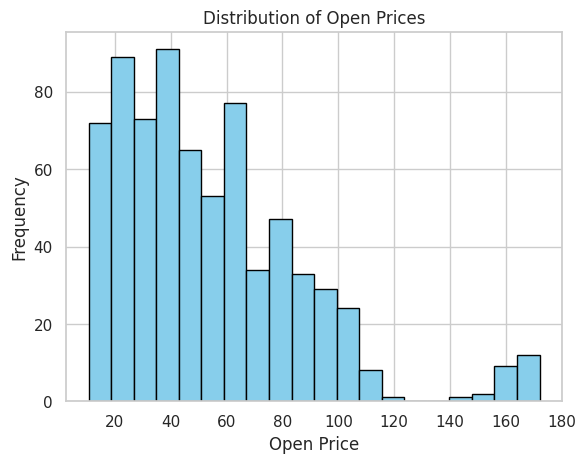

In [ ]:
# Visualize the distribution of 'open' prices
plt.figure(facecolor='white')
plt.hist(df['open'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Open Prices')
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.show()

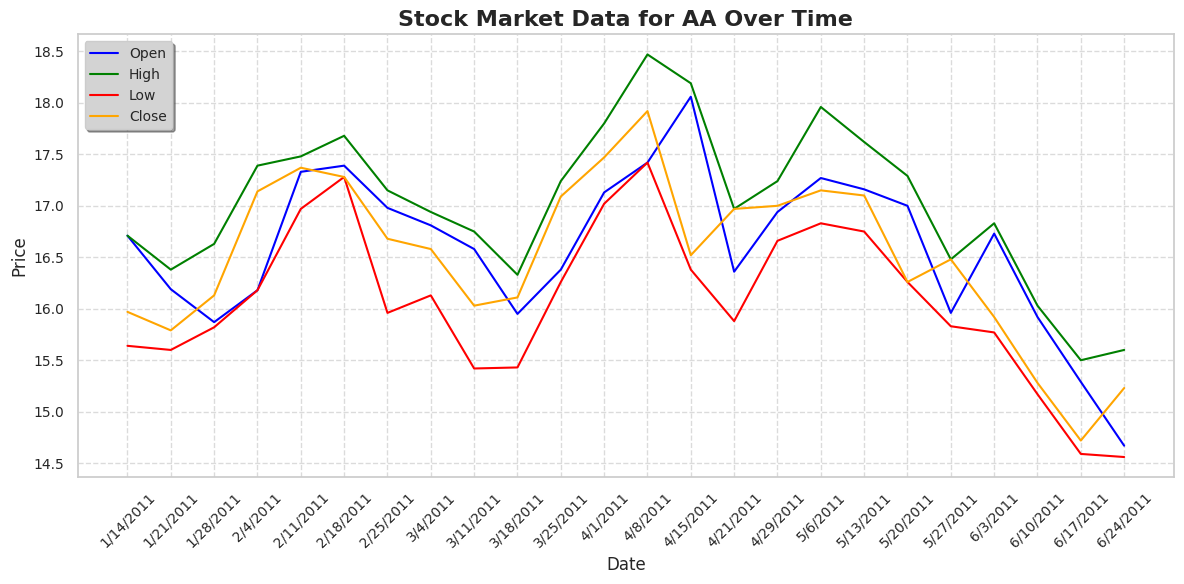

In [ ]:
# Function to plot stock market data for a specific stock
def plot_stock_data(stock):
    stock_data = df[df['stock'] == stock]
    plt.figure(figsize=(12, 6), facecolor='white')

    # Plot lines with specific colors and labels
    plt.plot(stock_data['date'], stock_data['open'], label='Open', color='blue')
    plt.plot(stock_data['date'], stock_data['high'], label='High', color='green')
    plt.plot(stock_data['date'], stock_data['low'], label='Low', color='red')
    plt.plot(stock_data['date'], stock_data['close'], label='Close', color='orange')

    plt.title(f'Stock Market Data for {stock} Over Time', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price', fontsize=12)

    # Customize legend with bold text
    plt.legend(loc='upper left', fontsize=10, fancybox=True, framealpha=1, shadow=True).get_frame().set_facecolor('lightgrey')
    plt.xticks(rotation=45)

    # Make tick labels larger for better readability
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# # Specify the stock to plot
plot_stock_data('AA')

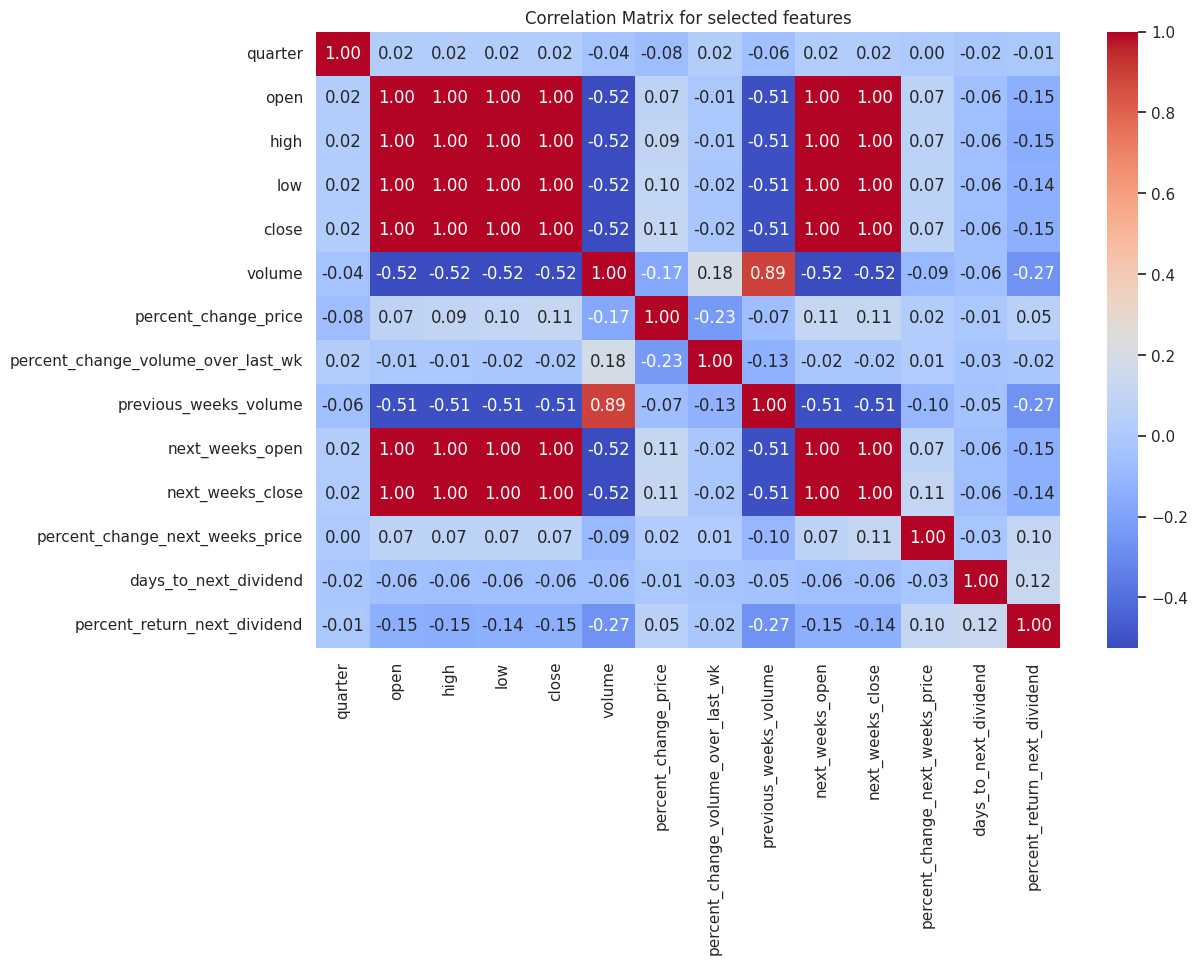

In [ ]:
# Calculate the correlation matrix
corr = df.select_dtypes(include=['number']).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for selected features')
plt.show()

# Machine Learning Models

## Linear Regression

In [ ]:
# Select features (X) and target variable (y)
X = df[['open', 'high', 'low', 'volume', 'percent_change_price', 'next_weeks_open', 'next_weeks_close',]]
y = df['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the lr_model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the lr_model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
ev_score = explained_variance_score(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred)
max_error = max(abs(y_test - y_pred))

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Explained Variance Score: {ev_score}')
print(f'Median Absolute Error: {median_ae}')
print(f'Maximum Error: {max_error}')

Mean Squared Error: 0.13728564731336357
Mean Absolute Error: 0.25173774551067474
R-squared: 0.9998877680231257
Explained Variance Score: 0.9998884746412645
Median Absolute Error: 0.15367936203983845
Maximum Error: 1.4160177122668642


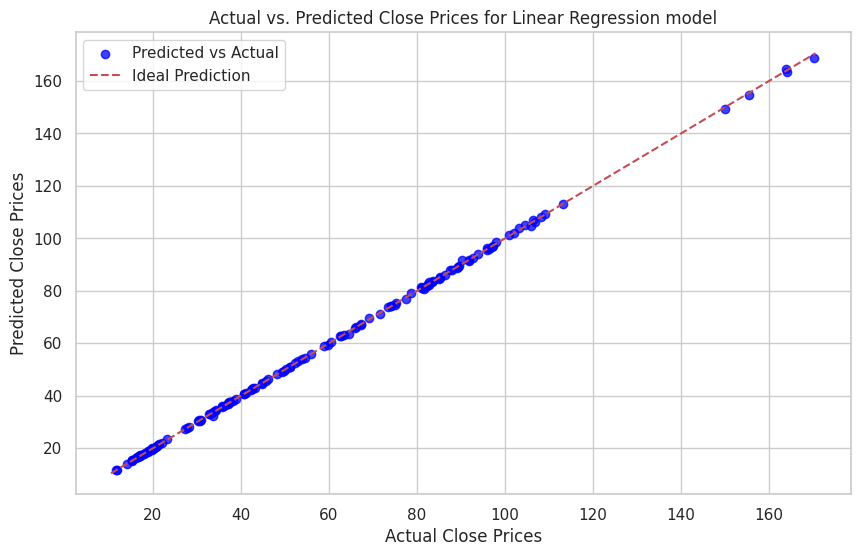

In [ ]:
# Scatter Plot of Actual vs. Predicted Values with enhancements
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.75, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Close Prices')
plt.ylabel('Predicted Close Prices')
plt.title('Actual vs. Predicted Close Prices for Linear Regression model')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal Prediction')
plt.legend()
plt.show()

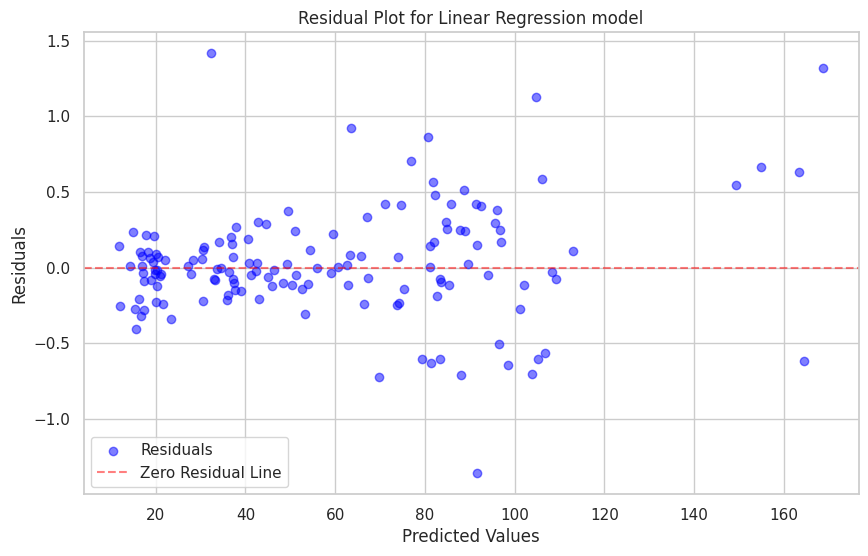

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Zero Residual Line')
plt.title('Residual Plot for Linear Regression model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()


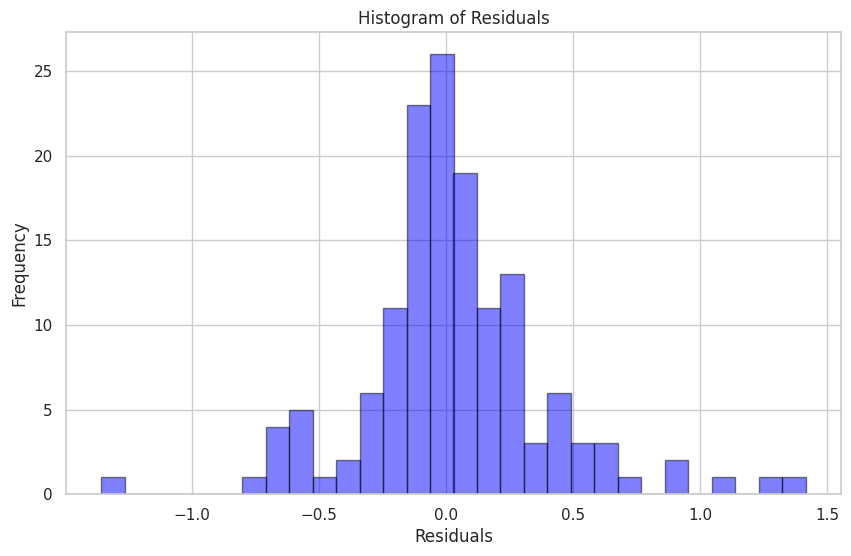

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.5, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##  Decision Tree Classifier

In [ ]:
# Create a binary target variable for 'close' price movement
df['close_change'] = (df['close'].diff() > 0).astype(int)
df.dropna(inplace=True)

# Define features and target variable
X = df[['open', 'high', 'low', 'volume']]
y = df['close_change']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree_model.predict(X_test)

# Predict probabilities for the test set
y_scores = decision_tree_model.predict_proba(X_test)[:, 1]

In [25]:
# Evaluate the decision_tree_model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(cm, display_labels=['Down', 'Up']).plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.5208333333333334
Precision: 0.5471698113207547
Recall: 0.3918918918918919
F1 Score: 0.4566929133858268


The ROC Curve helps in understanding the capability of the model to distinguish between classes.

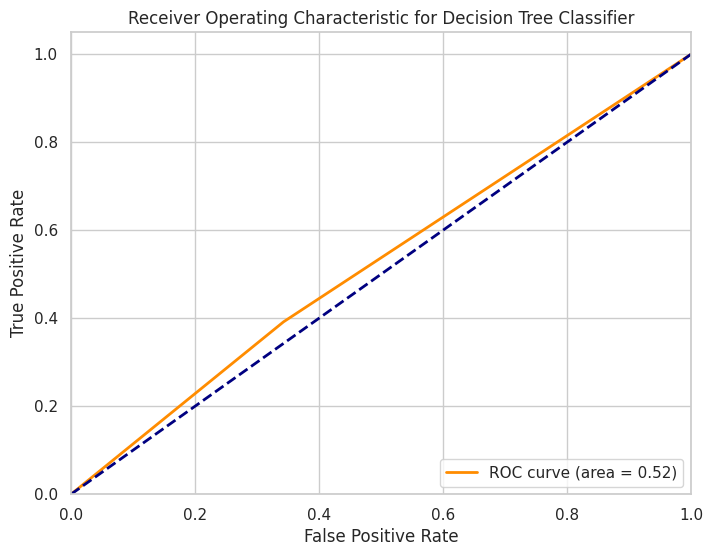

In [ ]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

The Precision-Recall Curve provides a detailed view of the trade-off between precision and recall for different probability thresholds.

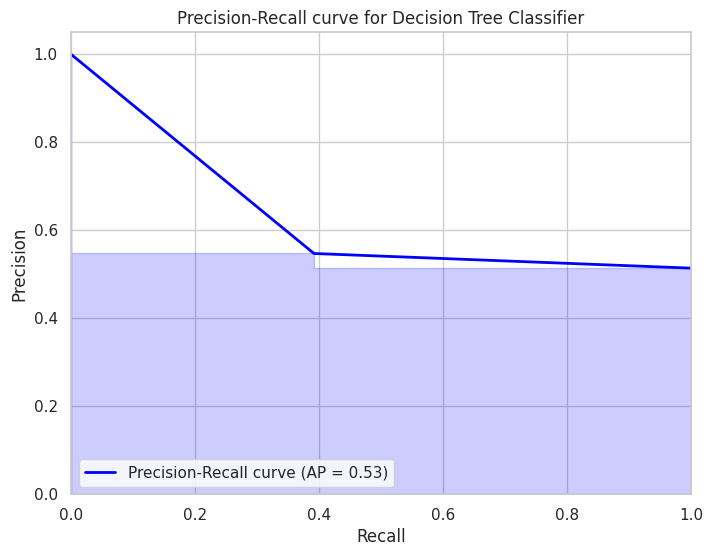

In [ ]:
# Compute Precision-Recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve for Decision Tree Classifier')
plt.legend(loc="lower left")
plt.show()

# Conclusion

The main difference between linear regression and decision tree classifier models lies in their output and application. Linear regression provides a continuous output and is best used when predicting exact future values with a linear relationship between variables, which may not hold for complex scenarios like stock prices influenced by numerous unpredictable factors. The decision tree classifier handles non-linear data better due to its hierarchical, tree-structured approach that splits data into branches representing different decision paths to effectively handle complex patterns. Decision trees are usually more interpretable than linear regression models, providing a clear visualisation of how decisions are made at each node. However, decision trees can be prone to overfitting complex datasets without proper tuning of parameters like tree depth, while linear regression is less likely to overfit but may underperform if the relationships are non-linear.
The linear regression and decision tree classifier models share some similarities in their reliance on data quality. Both models would achieve optimal performance when the input data is clean, relevant, and has undergone proper preprocessing steps. Feature selection is crucial for both modelling approaches, as the inclusion of irrelevant or highly correlated features can negatively impact their predictive capabilities.
In financial markets, these two models can be utilised in a complementary manner. Linear regression models could be employed to forecast future stock prices, providing continuous value predictions. Simultaneously, decision tree classifiers could be leveraged to make buy or sell decisions based on the predicted directional movements of stock prices obtained through binary classification.
